<a href="https://colab.research.google.com/github/TimonKazman/DataAnalyticsProjects/blob/main/Sentiment_Bert_Text_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install lightweight bert framework
!pip3 install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#install packages
import pandas as pd
import numpy as np
import os.path
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import ktrain
from ktrain import tabular
from ktrain import text
from sklearn.model_selection import train_test_split

In [3]:
#load data
df_test = pd.read_csv("Sentiment140_test.csv", names=["polarity", "id", "date", "query_device","user", "tweet"])

In [4]:
df_train = pd.read_csv("Sentiment140_train.csv", 
                       names=["polarity", "id", "date", "query_device","user", "tweet"], 
                       encoding="ISO-8859-1", 
                       warn_bad_lines=True, 
                       error_bad_lines=False, 
                       quotechar='"', 
                       delimiter=',',
                       engine = "python")

In [5]:
df_train

,polarity,id,date,query_device,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [6]:
df_test

,polarity,id,date,query_device,user,tweet
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...
...,...,...,...,...,...,...
493,2,14072,Sun Jun 14 04:31:43 UTC 2009,latex,proggit,Ask Programming: LaTeX or InDesign?: submitted...
494,0,14073,Sun Jun 14 04:32:17 UTC 2009,latex,sam33r,"On that note, I hate Word. I hate Pages. I hat..."
495,4,14074,Sun Jun 14 04:36:34 UTC 2009,latex,iamtheonlyjosie,Ahhh... back in a *real* text editing environm...
496,0,14075,Sun Jun 14 21:36:07 UTC 2009,iran,plutopup7,"Trouble in Iran, I see. Hmm. Iran. Iran so far..."


In [7]:
#little EDA & Data preprocessing/feature engineering
print("TEST:")
print(df_test.polarity.value_counts())
print("TRAIN")
print(df_train.polarity.value_counts())

TEST:
4    182
0    177
2    139
Name: polarity, dtype: int64
TRAIN
0    800000
4    800000
Name: polarity, dtype: int64


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   polarity      1600000 non-null  int64 
 1   id            1600000 non-null  int64 
 2   date          1600000 non-null  object
 3   query_device  1600000 non-null  object
 4   user          1600000 non-null  object
 5   tweet         1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [9]:
df_train.drop(["id", "date", "query_device", "user"],axis=1, inplace=True)
df_test.drop(["id", "date", "query_device", "user"],axis=1, inplace=True)

In [10]:
df_train.isnull().sum()

polarity    0
tweet       0
dtype: int64

In [11]:
df_train.dropna(inplace=True)

In [12]:
df_train.isnull().sum()

polarity    0
tweet       0
dtype: int64

In [13]:
print(len(df_train.tweet.max()))
print(len(df_train.tweet.min()))
print(len(df_test.tweet.max()))
print(len(df_test.tweet.min()))

163
52
26
133


In [14]:
df_test

,polarity,tweet
0,4,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,Reading my kindle2... Love it... Lee childs i...
2,4,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,@kenburbary You'll love your Kindle2. I've had...
4,4,@mikefish Fair enough. But i have the Kindle2...
...,...,...
493,2,Ask Programming: LaTeX or InDesign?: submitted...
494,0,"On that note, I hate Word. I hate Pages. I hat..."
495,4,Ahhh... back in a *real* text editing environm...
496,0,"Trouble in Iran, I see. Hmm. Iran. Iran so far..."


In [72]:
df_test = df_test[df_test["polarity"]!=2]

In [82]:
#give class names
df_test["polarity"] = df_test.polarity.apply(lambda x: "good" if x==4 else "bad")

<ipython-input-82-0094935b0c78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["polarity"] = df_test.polarity.apply(lambda x: "good" if x==4 else "bad")


In [83]:
df_test.head()

,polarity,tweet
0,good,I loooooooovvvvvveee my Kindle2. Not that the...
1,good,Reading my kindle2... Love it... Lee childs is...
2,good,"Ok, first assesment of the #kindle2 ...it fuck..."
3,good,You'll love your Kindle2. I've had mine for a...
4,good,Fair enough. But i have the Kindle2 and I thi...


In [84]:
#split train data to train and test
X_train, X_test, y_train, y_test = train_test_split(df_test["tweet"], 
                                                    df_test["polarity"], 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    shuffle = True,
                                                    stratify = df_test["polarity"])

In [65]:
#optional for cleaning the text data -> job is done by bert preprocessor...
"""

import re 

pattern = "'@[\w]+"
pattern_1 = "[ ]{2,}"
pattern_2 ="\\n[ ]{2,}"


df_train["tweet"] = df_train["tweet"].apply(lambda x: re.sub(pattern, "", x))
df_train["tweet"] = df_train["tweet"].apply(lambda x: re.sub(pattern_2, "", x))
df_train["tweet"] = df_train["tweet"].apply(lambda x: re.sub(pattern_1, " ", x))

df_test["tweet"] = df_test["tweet"].apply(lambda x: re.sub(pattern, "", x))
df_test["tweet"] = df_test["tweet"].apply(lambda x: re.sub(pattern_2, "", x))
df_test["tweet"] = df_test["tweet"].apply(lambda x: re.sub(pattern_1, " ", x))

pattern_3 = "@[\w]+"
df_train["tweet"] = df_train["tweet"].apply(lambda x: re.sub(pattern_3, "", x))
df_test["tweet"] = df_test["tweet"].apply(lambda x: re.sub(pattern_3, "", x))

"""

In [86]:
#get necessary data and preprocess with bert framework
(x_train_bert, y_train_bert), (x_val_bert, y_val_bert), preproc = text.texts_from_array(x_train=X_train.values,
                                                                                        y_train=y_train.values,
                                                                                        x_test=X_test.values,
                                                                                        y_test=y_test.values,
                                                                                        class_names=["good", "bad"],
                                                                                        preprocess_mode = "bert",
                                                                                        lang = "en",
                                                                                        max_features=35000,
                                                                                        maxlen=200)

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


/usr/local/lib/python3.8/dist-packages/ktrain/utils.py:737: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


task: text classification


In [87]:
#buidl the model & learner
model = text.text_classifier("bert", 
                             train_data=(x_train_bert, y_train_bert), 
                             preproc=preproc)

learner = ktrain.get_learner(model, 
                             train_data=(x_train_bert,y_train_bert), 
                             val_data=(x_val_bert, y_val_bert), 
                             batch_size=16)

Is Multi-Label? False
maxlen is 200
done.


In [88]:
#find the right values e.g. learning rate
learner.lr_find()

simulating training for different learning rates... this may take a few moments...


/usr/local/lib/python3.8/dist-packages/ktrain/core.py:609: UserWarning: max_epochs is being set to 5 since steps per epoch is small. If you wish to estimate LR using more epochs, set max_epochs manually.
  warnings.warn(


Epoch 1/5
18/18 [==============================] - 450s 23s/step - loss: 0.7582 - accuracy: 0.4948
Epoch 2/5
18/18 [==============================] - 426s 24s/step - loss: 0.6378 - accuracy: 0.6272
Epoch 3/5
18/18 [==============================] - 422s 23s/step - loss: 0.9783 - accuracy: 0.6516
Epoch 4/5
18/18 [==============================] - 421s 23s/step - loss: 4.1197 - accuracy: 0.5192
Epoch 5/5
18/18 [==============================] - 47s 1s/step - loss: 31.6153 - accuracy: 0.5625


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


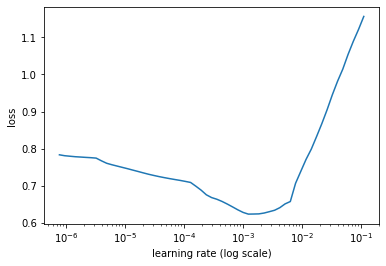

In [89]:
learner.lr_plot()

In [90]:
#to many epochs ; due to time constrains the run was cacelled by myself
learner.autofit(1e-5)

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 1e-05...
Epoch 1/1024
18/18 [==============================] - 488s 26s/step - loss: 0.7140 - accuracy: 0.5610 - val_loss: 0.6302 - val_accuracy: 0.5972
Epoch 2/1024
18/18 [==============================] - 459s 25s/step - loss: 0.5815 - accuracy: 0.7178 - val_loss: 0.5419 - val_accuracy: 0.7778
Epoch 3/1024
18/18 [==============================] - 462s 26s/step - loss: 0.4413 - accuracy: 0.8537 - val_loss: 0.4133 - val_accuracy: 0.7778
Epoch 4/1024
18/18 [==============================] - 462s 26s/step - loss: 0.2982 - accuracy: 0.9268 - val_loss: 0.2989 - val_accuracy: 0.8889
Epoch 5/1024
 4/18 [=====>........................] - ETA: 5:29 - loss: 0.2385 - accuracy: 0.9531

KeyboardInterrupt: ignored

In [ ]:
#accuracy easyly above 90%
learner.fit_onecycle(2e-5,4)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/4
18/18 [==============================] - 465s 26s/step - loss: 0.1734 - accuracy: 0.9652 - val_loss: 0.2347 - val_accuracy: 0.9306
Epoch 2/4
18/18 [==============================] - 458s 26s/step - loss: 0.0985 - accuracy: 0.9756 - val_loss: 0.2733 - val_accuracy: 0.8750
Epoch 3/4
18/18 [==============================] - 466s 26s/step - loss: 0.0465 - accuracy: 1.0000 - val_loss: 0.1802 - val_accuracy: 0.9306
Epoch 4/4
10/18 [===============>..............] - ETA: 3:15 - loss: 0.0569 - accuracy: 0.9812

In [ ]:
#validate the data
learner.validate(val_data=(X_test, y_test), class_names=["good", "bad"])

In [ ]:
#use appropriate learning rate
learner.autofit(1e-3)

In [ ]:
#validate the data again
learner.validate(val_data=(X_test, y_test), class_names=["good", "bad"])